# Importing Libraries

In [1]:
import os 
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D, MaxPooling2D, BatchNormalization,Dropout, Flatten,Activation,concatenate,Input,AlphaDropout
from keras.optimizers import Adam
from keras import models
from keras.utils import to_categorical
import tensorflow as tf
import random as rn
import cv2                  
from tqdm import tqdm
from random import shuffle  
import itertools
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16


# Creating the Dataset

In [2]:
x=[]
y=[]
path='../input/audio-to-images/Pre-processed_data/train/'
for ftype in os.listdir(path):
    for img in tqdm(os.listdir(path+ftype)):
        label=ftype
        path1 = os.path.join(path+ftype,img)
        img = cv2.imread(path1)
        #img = cv2.resize(img, (432,288))
        x.append(np.array(img))
        y.append(str(label))

100%|██████████| 900/900 [00:07<00:00, 114.21it/s]


# Encoding data

In [3]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y=to_categorical(y,9)
x=np.array(x)

# Splitting Data into Training, Testing and Validation Datasets using stratified split

In [4]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.10,random_state=42,stratify=y)

In [5]:
np.random.seed(42)
rn.seed(42)

# visualizing an image from the dataset

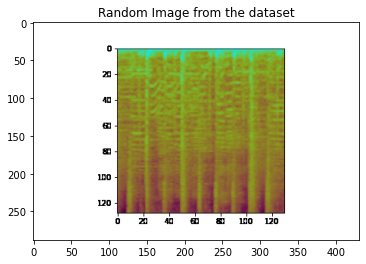

In [6]:
plt.imshow(x_train[77])
plt.title("Random Image from the dataset")
plt.show()

# Creating a basic CNN model

In [7]:
X_input = Input(shape=(288, 432,3))

X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
X = BatchNormalization(axis=3)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2,2))(X)
  
    
X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
X = BatchNormalization(axis=-1)(X)
X = Activation('relu')(X)
X = MaxPooling2D((2,2))(X)


X = Flatten()(X)

X = Dense(9, activation = "softmax")(X)

model = Model(inputs=X_input,outputs=X)

model.compile(optimizer=Adam(lr=0.0005),loss='CategoricalCrossentropy',metrics=['accuracy'])

# Training the model

In [8]:
history = model.fit(x_train,y_train, batch_size=128,
                              epochs = 40, 
                              validation_data = (x_val,y_val),
                              verbose = 1,
                             )

Epoch 1/40
57/57 [==============================] - 12s 210ms/step - loss: 31.5964 - accuracy: 0.3127 - val_loss: 31.7468 - val_accuracy: 0.1110
Epoch 2/40
57/57 [==============================] - 11s 191ms/step - loss: 2.5962 - accuracy: 0.6718 - val_loss: 12.8505 - val_accuracy: 0.1850
Epoch 3/40
57/57 [==============================] - 11s 193ms/step - loss: 1.1220 - accuracy: 0.7845 - val_loss: 5.7535 - val_accuracy: 0.3354
Epoch 4/40
57/57 [==============================] - 11s 193ms/step - loss: 0.4583 - accuracy: 0.8770 - val_loss: 3.0964 - val_accuracy: 0.4180
Epoch 5/40
57/57 [==============================] - 11s 193ms/step - loss: 0.7145 - accuracy: 0.8535 - val_loss: 2.4711 - val_accuracy: 0.5931
Epoch 6/40
57/57 [==============================] - 11s 191ms/step - loss: 0.6698 - accuracy: 0.8659 - val_loss: 0.8814 - val_accuracy: 0.8064
Epoch 7/40
57/57 [==============================] - 11s 193ms/step - loss: 0.1807 - accuracy: 0.9436 - val_loss: 0.8849 - val_accuracy: 0.8

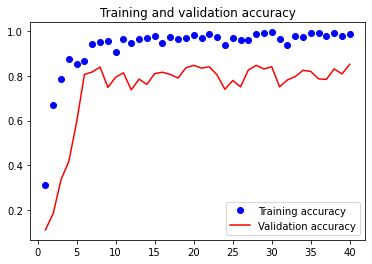

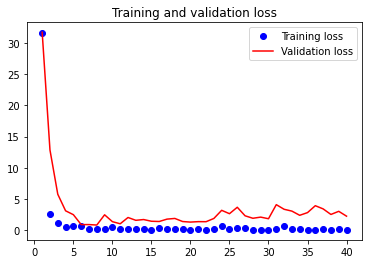

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
model.save('base_model.h5')